<a href="https://colab.research.google.com/github/Elena0591/Nuclio_DS/blob/main/Malware_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importación de librerias 

In [ ]:
import sys
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import random
import json
from pandas.io.json import json_normalize
from scipy import stats
from datetime import datetime

from sklearn import model_selection
import xgboost as xgb 

from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importación del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/MACHINE LEARNING/Lenguaje supervisado/sample_mmp.csv", sep = ";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (29,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


###EDA

In [ ]:
df.info(verbose = False )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(45), int64(9), object(30)
memory usage: 320.4+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [ ]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,8,85219.0,NaN,205.0,172,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,1443.0,275891.0,4.0,...,HDD,952838.0,0.0,8192.0,AllinOne,23.0,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,27.0,120.0,FullAuto,0.0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,355.0,19951.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,11.0,1.0
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,129,54198.0,NaN,126.0,124,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2102.0,248850.0,4.0,...,HDD,457600.0,0.0,8192.0,Notebook,13.2,1280.0,720.0,Mobile,lion,0.000000e+00,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,18.0,72.0,FullAuto,0.0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,486.0,48753.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,46781.0,2.0,1.0,1,149,122689.0,27.0,181.0,56,windows10,x64,10.0.0.0,10586,768,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,1.0,0,NaN,0.0,74.0,RequireAdmin,1.0,1.0,Convertible,Windows.Desktop,2206.0,238234.0,4.0,...,SSD,221251.0,0.0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.10586.1176,amd64,th2_release_sec,10586.0,1176.0,Core,CORE,Update,24.0,109.0,Notify,0.0,IS_GENUINE,Retail,NaN,0.0,Retail,0.0,554.0,33111.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,15.0,0.0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,164,114587.0,27.0,205.0,172,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,525.0,265410.0,8.0,...,SSD,228321.0,0.0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,NaN,5.770000e+02,10.0.17134.286,amd64,rs4_release,17134.0,286.0,Core,CORE,IBSClean,27.0,120.0,FullAuto,0.0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN

In [ ]:
TARGET = 'HasDetections'

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.set_index('MachineIdentifier', inplace = True)

In [ ]:
filtro_id = [col1 for col1 in df if col1.find('Identifier')>=0]
filtro_id

['DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [ ]:
df.drop([ 'CityIdentifier', 'GeoNameIdentifier','LocaleEnglishNameIdentifier', 'IeVerIdentifier','Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier'], axis=1, inplace=True)

In [ ]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 73 entries, ProductName to HasDetections
dtypes: float64(37), int64(7), object(29)
memory usage: 282.3+ MB


Deixo ID que crec que ens poden donar informació, la resta els elimino pq no aporten res al model. 

In [ ]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.0,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.0,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.0,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.0,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.0,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.0,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
OrganizationIdentifier,345437.0,2.486994e+01,5.613712e+00,1.0,18.0,27.0,2.700000e+01,5.200000e+01


In [ ]:
df.describe(exclude = np.number).T

,count,unique,top,freq
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436
SkuEdition,500000,8,Home,308567


In [ ]:
df['PuaMode'].isnull().sum() * 100/500000

99.9748

In [ ]:
df['PuaMode'].value_counts()

on    126
Name: PuaMode, dtype: int64

In [ ]:
df.drop(["PuaMode"], axis=1, inplace=True)

Elimino la variable PuaMode pq la columna unique és = 1 i no ens aporta res al model, a part de que té un 99% de nuls. 

In [ ]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 72 entries, ProductName to HasDetections
dtypes: float64(37), int64(7), object(28)
memory usage: 278.5+ MB


In [ ]:
description = df.describe(include = 'all').T

In [ ]:
description.to_excel('df_description.xlsx') #-->paso a a excel per tenir un control de les variables 

###Analisis del TARGET

In [ ]:
df[TARGET].describe()

count    499966.000000
mean          0.499906
std           0.500000
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HasDetections, dtype: float64

In [ ]:
df[TARGET].fillna(0.0, inplace=True)

In [ ]:
df[TARGET].head()

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    1.0
fd5ba6f5b75325ec0423a6c67cc75942    0.0
4e628391e7cc7c482fb3286f486dbd25    0.0
270a2e9d028144a4df12a9e3da79fba5    1.0
06ca8fa8d32c2abdc5b3577d676b3269    1.0
Name: HasDetections, dtype: float64

Veiem que el TARGET está balancejat i hi ha casi el 50% de maquines amb malware i un altre 50% sense malware


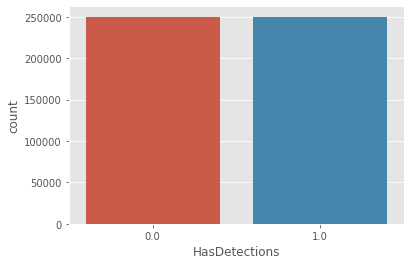

In [ ]:
sns.countplot(data=df, x='HasDetections')

In [ ]:
df['HasDetections'].value_counts(dropna=False)

0.0    250064
1.0    249936
Name: HasDetections, dtype: int64

###Analizar variables categoricas

###Product Name

In [ ]:
df['ProductName'].describe()

count           500000
unique               3
top       win8defender
freq            494604
Name: ProductName, dtype: object

La mayoria de maquinas tienen win8defender.

In [ ]:
df['ProductName'].value_counts()

win8defender     494604
mse                5395
mseprerelease         1
Name: ProductName, dtype: int64

In [ ]:
df['Platform'].describe()

count        500000
unique            4
top       windows10
freq         483048
Name: Platform, dtype: object

In [ ]:
df['Platform'].value_counts()

windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: Platform, dtype: int64

In [ ]:
df['Census_ChassisTypeName'].describe()

count       499929
unique          34
top       Notebook
freq        294216
Name: Census_ChassisTypeName, dtype: object

In [ ]:
df['Census_ChassisTypeName'].value_counts()

Notebook               294216
Desktop                104969
Laptop                  38257
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4214
UNKNOWN                  3694
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1687
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionChassis            1
25        

In [ ]:
top_chassis_list = df['Census_ChassisTypeName'].value_counts().head(5).index.to_list()

In [ ]:
top_chassis_list.append('Others')

In [ ]:
df['Census_ChassisTypeName'] = pd.Categorical(df['Census_ChassisTypeName'], categories = top_chassis_list )

In [ ]:
df['Census_ChassisTypeName'].value_counts(dropna = False)

Notebook    294216
Desktop     104969
Laptop       38257
NaN          30970
Portable     20181
AllinOne     11407
Others           0
Name: Census_ChassisTypeName, dtype: int64

In [ ]:
df['Census_ChassisTypeName'].fillna('Others', inplace = True)

In [ ]:
df['Census_ChassisTypeName'].value_counts(normalize = True)

Notebook    0.588432
Desktop     0.209938
Laptop      0.076514
Others      0.061940
Portable    0.040362
AllinOne    0.022814
Name: Census_ChassisTypeName, dtype: float64

In [ ]:
df.pivot_table (index = 'ProductName', values = TARGET, aggfunc = [len, np.mean])

,len,mean
,HasDetections,HasDetections
ProductName,,
mse,5395,0.479333
mseprerelease,1,0.000000
win8defender,494604,0.500097


In [ ]:
df.pivot_table (index = 'Platform', values = TARGET, aggfunc = [len, np.mean])

,len,mean
,HasDetections,HasDetections
Platform,,
windows10,483048,0.499865
windows2016,813,0.370234
windows7,5314,0.482123
windows8,10825,0.518614


In [ ]:
df['Census_InternalBatteryType'].describe()

count     144387
unique        28
top         lion
freq      113491
Name: Census_InternalBatteryType, dtype: object

In [ ]:
df['Census_InternalBatteryType'].value_counts(dropna = False)

NaN     355613
lion    113491
li-i     13854
#        10176
lip       3326
liio      1814
li p       466
li         356
nimh       272
real       162
bq20       143
pbac       130
vbox        89
lgi0        29
unkn        19
lipo        13
lhp0        12
ithi         7
4cel         6
ram          5
lipp         3
batt         3
bad          3
virt         2
a132         2
lgl0         1
li-l         1
icp3         1
3ion         1
Name: Census_InternalBatteryType, dtype: int64

In [ ]:
top_battery_list = df['Census_InternalBatteryType'].value_counts().head(5).index.to_list()

In [ ]:
top_battery_list.append('Others')

In [ ]:
df['Census_InternalBatteryType'] = pd.Categorical(df['Census_InternalBatteryType'], categories = top_battery_list )

In [ ]:
df['Census_InternalBatteryType'].value_counts(dropna = False)

NaN       357339
lion      113491
li-i       13854
#          10176
lip         3326
liio        1814
Others         0
Name: Census_InternalBatteryType, dtype: int64

In [ ]:
df['Census_InternalBatteryType'].fillna('Others', inplace = True)

In [ ]:
df['Census_InternalBatteryType'].value_counts(dropna = False)

Others    357339
lion      113491
li-i       13854
#          10176
lip         3326
liio        1814
Name: Census_InternalBatteryType, dtype: int64

In [ ]:
df['Census_OSEdition'].describe()

count     499966
unique        22
top         Core
freq      194466
Name: Census_OSEdition, dtype: object

In [ ]:
df['Census_OSEdition'].value_counts(dropna = False)

Core                        194466
Professional                175784
CoreSingleLanguage          108692
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1105
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
NaN                             34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: Census_OSEdition, dtype: int64

In [ ]:
top_edition_list = df['Census_OSEdition'].value_counts().head(5).index.to_list()

In [ ]:
top_edition_list.append('Others')

In [ ]:
df['Census_OSEdition'] = pd.Categorical(df['Census_OSEdition'], categories = top_edition_list )

In [ ]:
df['Census_OSEdition'].value_counts(dropna = False)

Core                     194466
Professional             175784
CoreSingleLanguage       108692
CoreCountrySpecific        9275
NaN                        8683
ProfessionalEducation      3100
Others                        0
Name: Census_OSEdition, dtype: int64

In [ ]:
df['Census_OSEdition'].fillna('Others', inplace = True)

In [ ]:
df['Census_OSEdition'].value_counts(dropna = False)

Core                     194466
Professional             175784
CoreSingleLanguage       108692
CoreCountrySpecific        9275
Others                     8683
ProfessionalEducation      3100
Name: Census_OSEdition, dtype: int64

In [ ]:
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    #en una única grafica de 2x1 en el primer slot
    ax1 = plt.subplot(2,1,1)
    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        dataframe[column],
        order = list(dataframe[column].unique())
    )
    ax2 = plt.subplot(2,1,2) # share ax1 para que me pinte el axis en el mismo orden
    ## Graficamos la distribución del target sólo para aquellos casos con target > 0 (para que no se chafe el BP) 
    ax2 = sns.boxenplot(
        data = dataframe[dataframe[target_column] > 0], 
        x = column,
        y = target_column,
        order = list(dataframe[column].unique())
    )
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


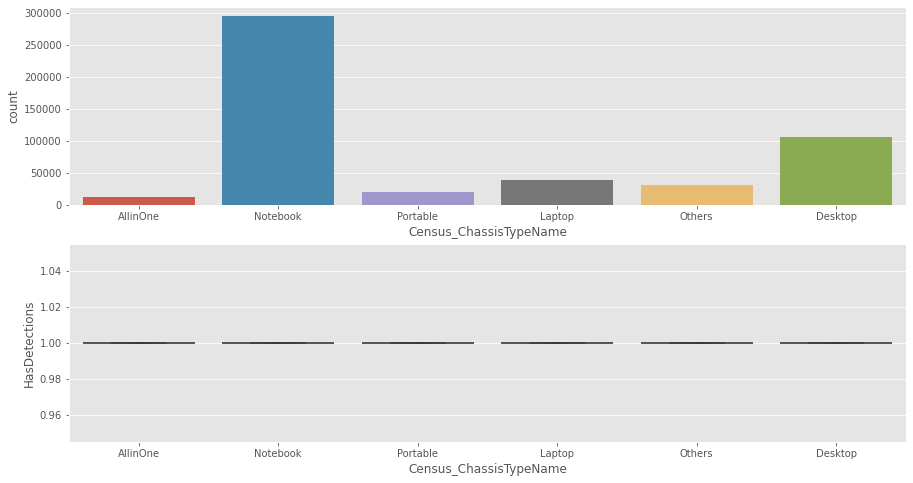

In [ ]:
plot_cat_values(df, 'Census_ChassisTypeName', TARGET)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


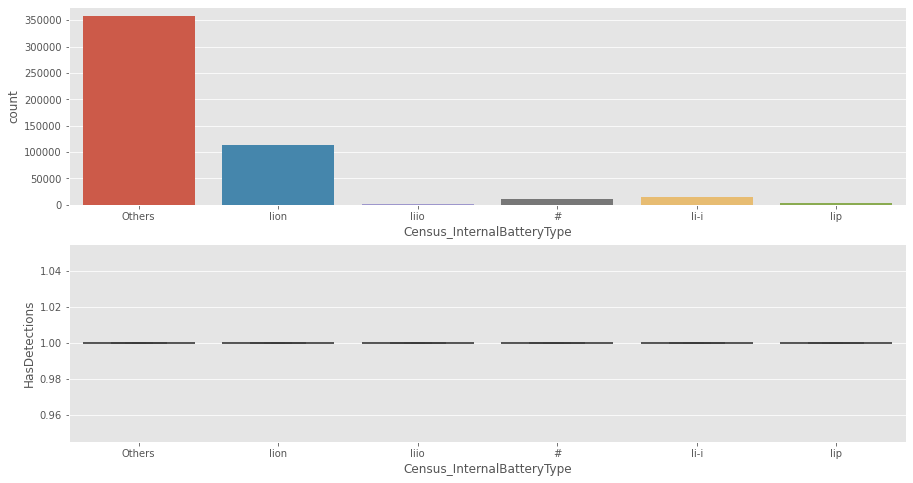

In [ ]:
plot_cat_values(df, 'Census_InternalBatteryType', TARGET)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


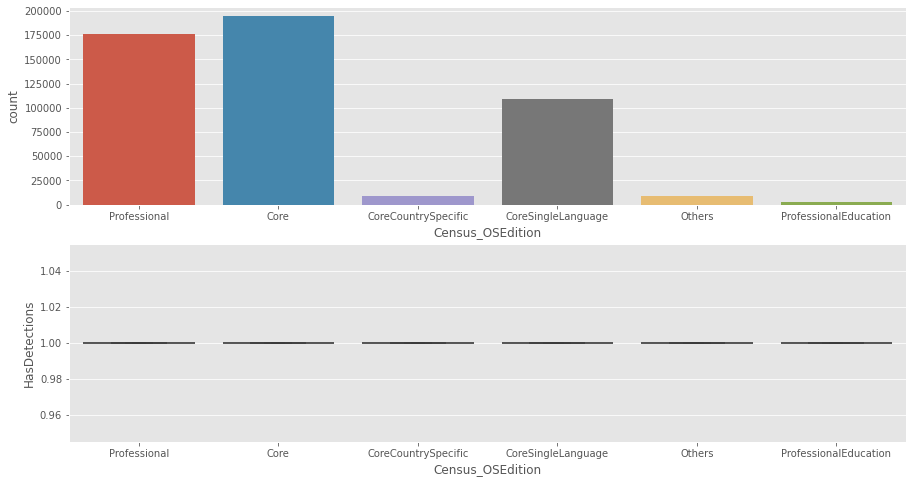

In [ ]:
plot_cat_values(df, 'Census_OSEdition', TARGET)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


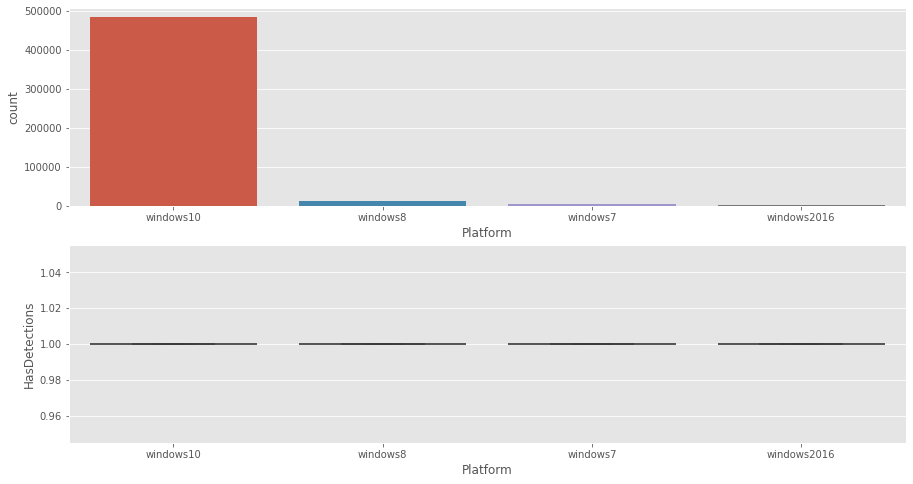

In [ ]:
plot_cat_values(df, 'Platform', TARGET)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


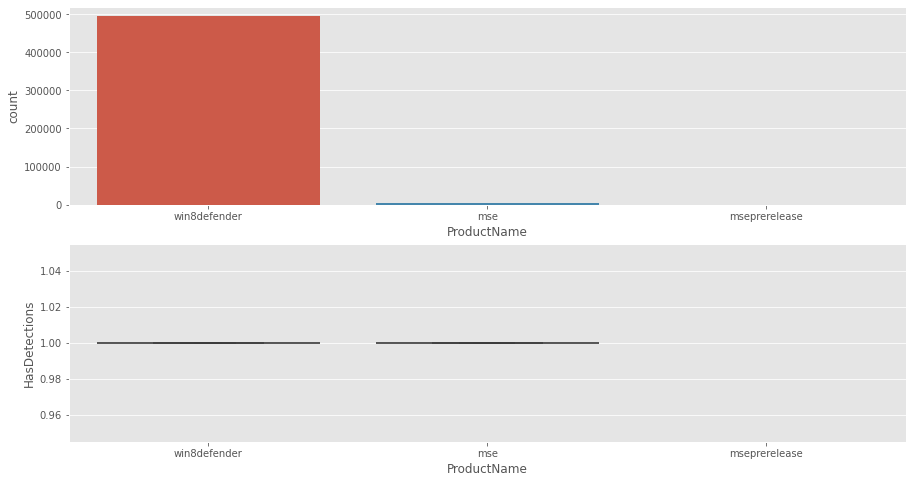

In [ ]:
plot_cat_values(df, 'ProductName', TARGET)

In [ ]:
df['Census_OSEdition'].value_counts()

Core                     194466
Professional             175784
CoreSingleLanguage       108692
CoreCountrySpecific        9275
Others                     8683
ProfessionalEducation      3100
Name: Census_OSEdition, dtype: int64

In [ ]:
df['Census_OSSkuName'].value_counts().head(5)

CORE                    194461
PROFESSIONAL            178923
CORE_SINGLELANGUAGE     108670
CORE_COUNTRYSPECIFIC      9257
EDUCATION                 2313
Name: Census_OSSkuName, dtype: int64

In [ ]:
pd.crosstab(df["Census_OSSkuName"], df["Census_OSEdition"])

Census_OSEdition,Core,Professional,CoreSingleLanguage,CoreCountrySpecific,ProfessionalEducation,Others
Census_OSSkuName,,,,,,
CLOUD,0,0,0,0,0,332
CLOUDN,0,0,0,0,0,1
CORE,194443,2,13,3,0,0
CORE_COUNTRYSPECIFIC,0,0,0,9257,0,0
CORE_N,0,0,0,0,0,251
CORE_SINGLELANGUAGE,2,4,108664,0,0,0
DATACENTER_EVALUATION_SERVER,0,0,0,0,0,47
EDUCATION,0,1,1,0,0,2311
EDUCATION_N,0,0,0,0,0,61


In [ ]:
df.drop(["Census_OSSkuName"], axis=1, inplace=True)

In [ ]:
df['Census_OSBranch'].value_counts()

rs4_release                  225989
rs3_release                   69209
rs3_release_svc_escrow        67019
rs2_release                   44262
rs1_release                   43701
th2_release                   18298
th2_release_sec               14895
th1_st1                       10821
th1                            4284
rs5_release                     839
rs3_release_svc_escrow_im       329
rs_prerelease                   184
rs_prerelease_flt               132
rs5_release_sigma                 3
winblue_ltsb_escrow               1
Name: Census_OSBranch, dtype: int64

Elimino la variable Census_OSSkuName pq explica el mateix que la Census_OSEdition. 

In [ ]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Others')

In [ ]:
df['Census_OSBranch'] = setOthers(df, 'Census_OSBranch', 6)

In [ ]:
df['SmartScreen'].value_counts()

RequireAdmin    241594
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02               20
&#x01               14
on                   8
requireadmin         1
Name: SmartScreen, dtype: int64

In [ ]:
df['SmartScreen'] = setOthers(df, 'SmartScreen', 6)

In [ ]:
df['Census_MDC2FormFactor'].value_counts().head(5)

Notebook       320933
Desktop        109514
Convertible     22368
Detachable      16798
AllInOne        16371
Name: Census_MDC2FormFactor, dtype: int64

In [ ]:
df['Census_MDC2FormFactor'] = setOthers(df, 'Census_MDC2FormFactor', 6)

In [ ]:
df['Census_ChassisTypeName'].value_counts()

Notebook    294216
Desktop     104969
Laptop       38257
Others       30970
Portable     20181
AllinOne     11407
Name: Census_ChassisTypeName, dtype: int64

In [ ]:
df['Census_ActivationChannel'].value_counts()

Retail            264908
OEM:DM            191346
Volume:GVLK        25106
OEM:NONSLP         17940
Volume:MAK           468
Retail:TB:Eval       198
Name: Census_ActivationChannel, dtype: int64

In [ ]:
df['Census_FlightRing'].value_counts()

Retail      468269
NOT_SET      16043
Unknown      13698
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: Census_FlightRing, dtype: int64

###LIMPIEZA DE ATRIBUTOS

###Ajuste de tipos

In [ ]:
selec_id = [col1 for col1 in df if col1.find('Identifier')>=0]
selec_id

['DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_OSUILocaleIdentifier',
 'Wdft_RegionIdentifier']

In [ ]:
df['DefaultBrowsersIdentifier'] = df['DefaultBrowsersIdentifier'].astype(object)

In [ ]:
def transform (dataframe, column):
  column.find('Identifier')
  dataframe[column] = dataframe[column].astype(object)

In [ ]:
df['DefaultBrowsersIdentifier'] = transform(df, 'DefaultBrowsersIdentifier')

In [ ]:
df['DefaultBrowsersIdentifier'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: DefaultBrowsersIdentifier, dtype: object

In [ ]:
df['AVProductStatesIdentifier'] = transform(df, 'AVProductStatesIdentifier')

In [ ]:
df['CountryIdentifier'] = transform(df, 'CountryIdentifier')

In [ ]:
df['Census_OEMNameIdentifier'] = transform(df, 'Census_OEMNameIdentifier')

In [ ]:
df['Census_OEMModelIdentifier'] = transform(df, 'Census_OEMModelIdentifier')

In [ ]:
df['Census_OSUILocaleIdentifier'] = transform(df, 'Census_OSUILocaleIdentifier')

In [ ]:
df['Wdft_RegionIdentifier'] = transform(df, 'Wdft_RegionIdentifier')

He transformado los id en objeto para luego volver a generalos a numericos

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 71 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ProductName                                        500000 non-null  object  
 1   EngineVersion                                      500000 non-null  object  
 2   AppVersion                                         500000 non-null  object  
 3   AvSigVersion                                       500000 non-null  object  
 4   IsBeta                                             500000 non-null  int64   
 5   RtpStateBitfield                                   498168 non-null  float64 
 6   IsSxsPassiveMode                                   500000 non-null  int64   
 7   DefaultBrowsersIdentifier                          0 non-null       object  
 8   AVProductSta

###Imputar valores nulos

Variables categoricas

In [ ]:
df.select_dtypes(include = ['object']).isnull().sum() 

ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
DefaultBrowsersIdentifier           500000
AVProductStatesIdentifier           500000
CountryIdentifier                   500000
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
Census_DeviceFamily                     34
Census_OEMNameIdentifier            500000
Census_OEMModelIdentifier           500000
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             743
Census_PowerPlatformRoleName            36
Census_OSVersion                        34
Census_OSArchitecture                   34
Census_OSInstallTypeName                34
Census_OSUILocaleIdentifier         500000
Census_OSWU

In [ ]:
df.drop(["Census_ProcessorClass"], axis=1, inplace=True) #--> elimino pq el 99% de valors que té, són nuls

In [ ]:
df['OsBuildLab'].value_counts(dropna = False).head(10)

17134.1.amd64fre.rs4_release.180410-1804                 206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     69884
16299.15.amd64fre.rs3_release.170928-1534                 53826
15063.0.amd64fre.rs2_release.170317-1834                  39908
17134.1.x86fre.rs4_release.180410-1804                    14334
16299.15.x86fre.rs3_release.170928-1534                   13105
14393.2189.amd64fre.rs1_release.180329-1711               10724
10240.17443.amd64fre.th1.170602-2340                       9538
10586.1176.amd64fre.th2_release_sec.170913-1848            8385
15063.0.x86fre.rs2_release.170317-1834                     3444
Name: OsBuildLab, dtype: int64

In [ ]:
df['OsBuildLab'].fillna(value = "zzzz", inplace = True)

In [ ]:
for i in df.select_dtypes(include = ['object']):
    print(i, df[i].fillna(value = "zzzz", inplace = True))

ProductName None
EngineVersion None
AppVersion None
AvSigVersion None
DefaultBrowsersIdentifier None
AVProductStatesIdentifier None
CountryIdentifier None
Platform None
Processor None
OsVer None
OsPlatformSubRelease None
OsBuildLab None
SkuEdition None
Census_DeviceFamily None
Census_OEMNameIdentifier None
Census_OEMModelIdentifier None
Census_PrimaryDiskTypeName None
Census_PowerPlatformRoleName None
Census_OSVersion None
Census_OSArchitecture None
Census_OSInstallTypeName None
Census_OSUILocaleIdentifier None
Census_OSWUAutoUpdateOptionsName None
Census_GenuineStateName None
Census_ActivationChannel None
Census_FlightRing None
Wdft_RegionIdentifier None


Variables numeriques

In [ ]:
df.select_dtypes(include = ['number']).isnull().sum() 

IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
OrganizationIdentifier                               154563
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
AutoSampleOptIn                                           0
SMode                                                 29848
Firewall                                               5196
UacLuaenable                                            657
Census_ProcessorCoreCount                              2380
Census_PrimaryDiskTotalCapacity                        3008
Census_SystemVolumeTotalCapacity        

In [ ]:
for i in df.select_dtypes(include = ['number']):
    print(i, df[i].fillna(value = -100, inplace = True))

IsBeta None
RtpStateBitfield None
IsSxsPassiveMode None
AVProductsInstalled None
AVProductsEnabled None
HasTpm None
OrganizationIdentifier None
OsBuild None
OsSuite None
IsProtected None
AutoSampleOptIn None
SMode None
Firewall None
UacLuaenable None
Census_ProcessorCoreCount None
Census_PrimaryDiskTotalCapacity None
Census_SystemVolumeTotalCapacity None
Census_HasOpticalDiskDrive None
Census_TotalPhysicalRAM None
Census_InternalPrimaryDiagonalDisplaySizeInInches None
Census_InternalPrimaryDisplayResolutionHorizontal None
Census_InternalPrimaryDisplayResolutionVertical None
Census_InternalBatteryNumberOfCharges None
Census_OSBuildNumber None
Census_OSBuildRevision None
Census_IsPortableOperatingSystem None
Census_IsFlightingInternal None
Census_IsFlightsDisabled None
Census_ThresholdOptIn None
Census_IsSecureBootEnabled None
Census_IsWIMBootEnabled None
Census_IsVirtualDevice None
Census_IsTouchEnabled None
Census_IsPenCapable None
Census_IsAlwaysOnAlwaysConnectedCapable None
Wdft_IsGa

**FREQUENCY ENCODING DE LAS VARIABLES QUE EN LA COLUMNA UNIQUE SON > 100**

In [ ]:
freq_enc = ['AvSigVersion', 'OsBuildLab', 'Census_OSVersion']

In [ ]:
df_AvSigVersion_num = pd.DataFrame(df['AvSigVersion'].value_counts(dropna = False))# variable AvSigVersion

In [ ]:
df_AvSigVersion_num.columns = ['NUM_Versiones']

In [ ]:
df_AvSigVersion_num['AvSigVersion'] = df_AvSigVersion_num.index

In [ ]:
df_AvSigVersion_num.head(2)

,NUM_Versiones,AvSigVersion
1.273.1420.0,5771,1.273.1420.0
1.263.48.0,5537,1.263.48.0


In [ ]:
df = df.merge(df_AvSigVersion_num, on = 'AvSigVersion')

In [ ]:
df.drop('AvSigVersion', axis = 1, inplace = True)

In [ ]:
df.head(5)

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,NUM_Versiones
0,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,zzzz,zzzz,1.0,1.0,1,zzzz,-100.0,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,zzzz,zzzz,4.0,953869.0,HDD,952838.0,0.0,8192.0,AllinOne,23.0,1920.0,1080.0,Desktop,Others,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,UUPUpgrade,zzzz,FullAuto,0.0,IS_GENUINE,OEM:DM,-100.0,0.0,Retail,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,zzzz,1.0,1043
1,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,zzzz,zzzz,2.0,1.0,1,zzzz,27.0,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,zzzz,zzzz,4.0,476940.0,HDD,190001.0,0.0,8192.0,Notebook,17.2,1600.0,900.0,Mobile,lion,0.000000e+00,10.0.16299.431,amd64,rs3_release_svc_escrow,16299.0,431.0,Core,UUPUpgrade,zzzz,Notify,0.0,IS_GENUINE,OEM:DM,-100.0,0.0,Retail,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,zzzz,1.0,1043
2,win8defender,1.1.15100.1,4.12.16299.15,0,7.0,0,zzzz,zzzz,2.0,1.0,1,zzzz,27.0,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,Others,1.0,1.0,AllInOne,Windows.Desktop,zzzz,zzzz,2.0,953869.0,HDD,938569.0,0.0,8192.0,AllinOne,23.8,1920.0,1080.0,Desktop,Others,4.294967e+09,10.0.16299.547,amd64,rs3_release_svc_escrow,16299.0,547.0,Core,Other,zzzz,UNKNOWN,0.0,IS_GENUINE,OEM:DM,-100.0,0.0,Retail,-100.0,1.0,-100.0,0.0,1.0,0.0,0.0,0.0,zzzz,0.0,1043
3,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,zzzz,zzzz,2.0,1.0,1,zzzz,27.0,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,Others,1.0,1.0,Notebook,Windows.Desktop,zzzz,zzzz,8.0,244198.0,SSD,243198.0,0.0,16384.0,Notebook,15.5,1920.0,1080.0,Mobile,Others,0.000000e+00,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,Upgrade,zzzz,FullAuto,0.0,IS_GENUINE,Retail,-100.0,0.0,Retail,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,1.0,zzzz,0.0,1043
4,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,zzzz,zzzz,1.0,1.0,1,zzzz,27.0,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,0.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,zzzz,zzzz,4.0,953869.0,HDD,479939.0,0.0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.16299.248,amd64,rs3_release,16299.0,248.0,Core,Upgrade,zzzz,Notify,0.0,IS_GENUINE,OEM:DM,-100.0,0.0,Retail,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,zzzz,1.0,1043


In [ ]:
df_OsBuildLab_num = pd.DataFrame(df['OsBuildLab'].value_counts(dropna = False))# variable OsBuildLab

In [ ]:
df_OsBuildLab_num.columns = ['NUM_build']

In [ ]:
df_OsBuildLab_num['OsBuildLab'] = df_OsBuildLab_num.index

In [ ]:
df_OsBuildLab_num.head(2)

,NUM_build,OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804,206436,17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908,69884,16299.431.amd64fre.rs3_release_svc_escrow.1805...


In [ ]:
df = df.merge(df_OsBuildLab_num, on = 'OsBuildLab')

In [ ]:
df.drop('OsBuildLab', axis = 1, inplace = True)

In [ ]:
df_Census_OSVersion_num = pd.DataFrame(df['Census_OSVersion'].value_counts(dropna = False))# variable Census_OSVersion

In [ ]:
df_Census_OSVersion_num.columns = ['census_versiones']

In [ ]:
df_Census_OSVersion_num['Census_OSVersion'] = df_Census_OSVersion_num.index

In [ ]:
df_Census_OSVersion_num.head(2)

,census_versiones,Census_OSVersion
10.0.17134.228,79970,10.0.17134.228
10.0.17134.165,50508,10.0.17134.165


In [ ]:
df = df.merge(df_Census_OSVersion_num, on = 'Census_OSVersion')

In [ ]:
df.drop('Census_OSVersion', axis = 1, inplace = True)

In [ ]:
df.head(2)

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,AutoSampleOptIn,SMode,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,NUM_Versiones,NUM_build,census_versiones
0,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,zzzz,zzzz,1.0,1.0,1,zzzz,-100.0,windows10,x64,10.0.0.0,17134,256,rs4,Pro,1.0,0,0.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,zzzz,zzzz,4.0,953869.0,HDD,952838.0,0.0,8192.0,AllinOne,23.0,1920.0,1080.0,Desktop,Others,4.294967e+09,amd64,rs4_release,17134.0,165.0,Professional,UUPUpgrade,zzzz,FullAuto,0.0,IS_GENUINE,OEM:DM,-100.0,0.0,Retail,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,zzzz,1.0,1043,206436,50508
1,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,zzzz,zzzz,2.0,1.0,1,zzzz,27.0,windows10,x64,10.0.0.0,17134,256,rs4,Pro,1.0,0,0.0,Others,1.0,1.0,Notebook,Windows.Desktop,zzzz,zzzz,8.0,244198.0,SSD,243198.0,0.0,16384.0,Notebook,15.5,1920.0,1080.0,Mobile,Others,0.000000e+00,amd64,rs4_release,17134.0,165.0,Professional,Upgrade,zzzz,FullAuto,0.0,IS_GENUINE,Retail,-100.0,0.0,Retail,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,1.0,zzzz,0.0,1043,206436,50508


**ONE HOT ENCODING**

In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
DefaultBrowsersIdentifier,500000,1,zzzz,500000
AVProductStatesIdentifier,500000,1,zzzz,500000
CountryIdentifier,500000,1,zzzz,500000
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779


In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 70 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ProductName                                        500000 non-null  object  
 1   EngineVersion                                      500000 non-null  object  
 2   AppVersion                                         500000 non-null  object  
 3   IsBeta                                             500000 non-null  int64   
 4   RtpStateBitfield                                   500000 non-null  float64 
 5   IsSxsPassiveMode                                   500000 non-null  int64   
 6   DefaultBrowsersIdentifier                          500000 non-null  object  
 7   AVProductStatesIdentifier                          500000 non-null  object  
 8   AVProductsInstalled                                500000 non-nu

In [ ]:
df.drop(['DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'CountryIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_OSUILocaleIdentifier', 'Wdft_RegionIdentifier'], axis = 1, inplace = True)

In [ ]:
def generate_dummies(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [ ]:
for column in df.select_dtypes(exclude=np.number).columns:
    df = generate_dummies(df, column)

In [ ]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Columns: 336 entries, IsBeta to Census_FlightRing_zzzz
dtypes: float64(31), int64(9), uint8(296)
memory usage: 297.5 MB


###MODELLING

In [ ]:
df['NUM_Versiones'].value_counts()

5771    5771
5537    5537
5317    5317
5214    5214
4799    4799
        ... 
75        75
73        73
71        71
68        68
64        64
Name: NUM_Versiones, Length: 623, dtype: int64

In [ ]:
df.head(2).T

,0,1
IsBeta,0.0,0.0
RtpStateBitfield,7.0,7.0
IsSxsPassiveMode,0.0,0.0
AVProductsInstalled,1.0,2.0
AVProductsEnabled,1.0,1.0
...,...,...
Census_FlightRing_Retail,1.0,1.0
Census_FlightRing_Unknown,0.0,0.0
Census_FlightRing_WIF,0.0,0.0
Census_FlightRing_WIS,0.0,0.0


In [ ]:
df.columns

Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsInstalled',
       'AVProductsEnabled', 'HasTpm', 'OrganizationIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected',
       ...
       'Census_ActivationChannel_zzzz', 'Census_FlightRing_Disabled',
       'Census_FlightRing_NOT_SET', 'Census_FlightRing_OSG',
       'Census_FlightRing_RP', 'Census_FlightRing_Retail',
       'Census_FlightRing_Unknown', 'Census_FlightRing_WIF',
       'Census_FlightRing_WIS', 'Census_FlightRing_zzzz'],
      dtype='object', length=336)

In [ ]:
df.pivot_table(index = ['NUM_Versiones'], values = TARGET, aggfunc = [len, sum, np.mean])

,len,sum,mean
,HasDetections,HasDetections,HasDetections
NUM_Versiones,,,
1,1497,527.0,0.352037
2,1828,688.0,0.376368
3,1773,673.0,0.379583
4,1576,642.0,0.407360
5,1315,505.0,0.384030
...,...,...,...
4799,4799,2470.0,0.514691
5214,5214,2619.0,0.502301


In [ ]:
dev_df = df[(df['NUM_Versiones'] <= 517)]#development = train + test
val_df = df[(df['NUM_Versiones'] >= 517)]# validation

In [ ]:
df['NUM_Versiones'].describe()

count    500000.000000
mean       1141.268696
std        1402.269614
min           1.000000
25%         287.000000
50%         517.000000
75%        1398.000000
max        5771.000000
Name: NUM_Versiones, dtype: float64

In [ ]:
dev_df.shape

(250313, 336)

In [ ]:
val_df.shape

(250204, 336)

Diferenciar entre lo que son atributos y lo que no lo es y se realiza tanto el parte del development y del validation

In [ ]:
dev_df_X = dev_df.drop('HasDetections', axis=1) #--> todos los predictores que tengo 
dev_df_y = dev_df[['HasDetections']] # vector

In [ ]:
val_df_X = val_df.drop('HasDetections', axis=1)
val_df_y = val_df[['HasDetections']]

In [ ]:
dev_df_X.head().T

,1192,1193,1194,1266,1267
IsBeta,0.0,0.0,0.0,0.0,0.0
RtpStateBitfield,7.0,7.0,7.0,0.0,7.0
IsSxsPassiveMode,0.0,0.0,0.0,1.0,0.0
AVProductsInstalled,2.0,1.0,2.0,2.0,1.0
AVProductsEnabled,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
Census_FlightRing_Retail,1.0,1.0,1.0,1.0,1.0
Census_FlightRing_Unknown,0.0,0.0,0.0,0.0,0.0
Census_FlightRing_WIF,0.0,0.0,0.0,0.0,0.0
Census_FlightRing_WIS,0.0,0.0,0.0,0.0,0.0


In [ ]:
dev_df_y.head().T

,1192,1193,1194,1266,1267
HasDetections,1.0,1.0,0.0,1.0,0.0


###Random Holdout : seleccionar entre train y test, esta division es aleatoria

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # proporcion que queremos para train y test
                                        random_state = 42
                                     )

In [ ]:
X_train.info(verbose=False) # tenemos 175219 filas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175219 entries, 170518 to 260596
Columns: 335 entries, IsBeta to Census_FlightRing_zzzz
dtypes: float64(30), int64(9), uint8(296)
memory usage: 102.9 MB


In [ ]:
X_test.info(verbose=False) # tenemos 75094 filas 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75094 entries, 222992 to 414438
Columns: 335 entries, IsBeta to Census_FlightRing_zzzz
dtypes: float64(30), int64(9), uint8(296)
memory usage: 44.1 MB


In [ ]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
IsBeta,175219.0,0.000006,0.002389,0.0,0.0,0.0,0.0,1.0
RtpStateBitfield,175219.0,6.468089,6.406289,-100.0,7.0,7.0,7.0,8.0
IsSxsPassiveMode,175219.0,0.016950,0.129085,0.0,0.0,0.0,0.0,1.0
AVProductsInstalled,175219.0,0.961728,6.192687,-100.0,1.0,1.0,2.0,5.0
AVProductsEnabled,175219.0,0.645758,6.153254,-100.0,1.0,1.0,1.0,4.0


In [ ]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
IsBeta,75094.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
RtpStateBitfield,75094.0,6.417277,6.806214,-100.0,7.0,7.0,7.0,8.0
IsSxsPassiveMode,75094.0,0.016899,0.128893,0.0,0.0,0.0,0.0,1.0
AVProductsInstalled,75094.0,0.949383,6.275202,-100.0,1.0,1.0,2.0,5.0
AVProductsEnabled,75094.0,0.636203,6.235913,-100.0,1.0,1.0,1.0,4.0


In [ ]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,175219.0,0.480621,0.499626,0.0,0.0,0.0,1.0,1.0


In [ ]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,75094.0,0.482901,0.499711,0.0,0.0,0.0,1.0,1.0


###Entrenamiento del modelo

1. **Importar los scikits de la modelizacion**

In [ ]:
!conda install python-graphviz -y

/bin/bash: conda: command not found


In [ ]:
!conda install pydot -y

/bin/bash: conda: command not found


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


from sklearn import metrics
from sklearn import model_selection


2. **Instanciar el modelo**: decidimo aplicar el modelo de decision tree clasifier porque el targuet es categorico y dicotomic. Seleccionamos los parametros de max_depth y random_state.

In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=8, # Importante, regulará el sobreajuste y es el nº de preguntas
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

3.**Entrenar el modelo**

In [ ]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,# important
                        out_file=None, #important
                        # max_depth=None,
                        feature_names=X_test.columns, # important
                        class_names=['No malware', 'Yes malware'], # important
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

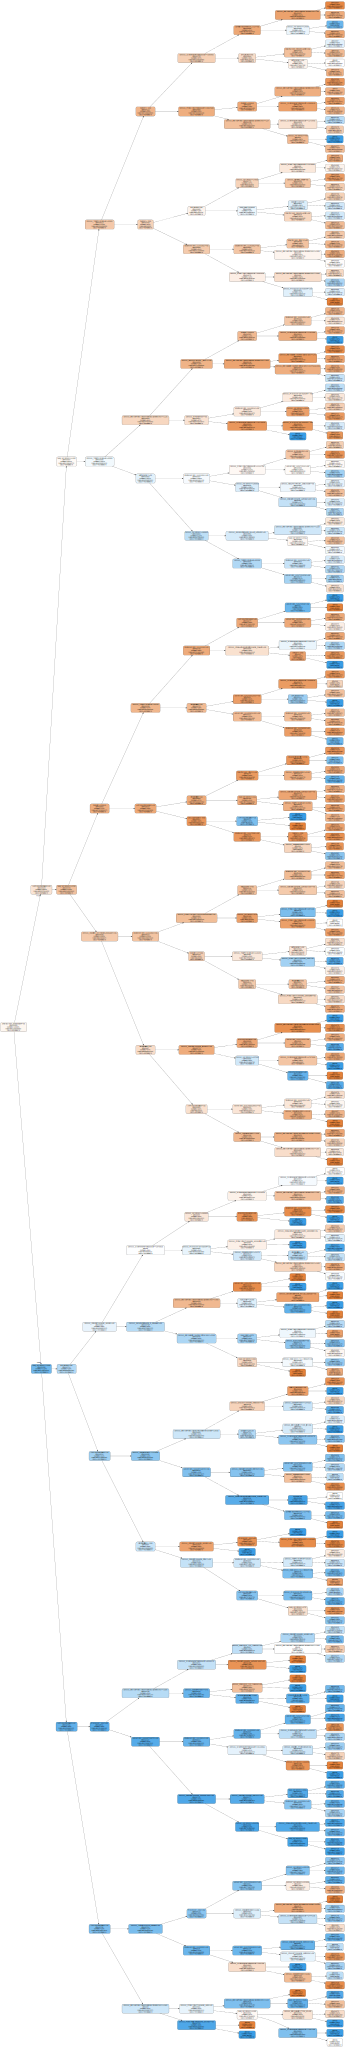

In [ ]:
 graphviz.Source(dot_data) # generación del arbol

1.4 **Evaluar el modelo**

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index = y_test.index, columns =['Malware Prediction']) #amb threshold del 0.5 y evaluar el modelo sobre el test. Mantengo el index del dt del test

In [ ]:
results_df = y_test.join(y_test_pred) # aqui vemos lo que hay con lo que yo he predecido.

In [ ]:
results_df.head(10)

,HasDetections,Malware Prediction
222992,0.0,1.0
266241,1.0,0.0
52494,0.0,1.0
352710,1.0,0.0
317148,1.0,1.0
378381,1.0,1.0
154329,0.0,1.0
468905,1.0,0.0
161611,1.0,1.0
305758,1.0,1.0


In [ ]:
results_df['succes'] = (results_df['HasDetections'] == results_df['Malware Prediction']).astype(int)

In [ ]:
results_df['succes'].mean()  #Accuracy 

0.6181852078727994

Esto es el Accuracy y podemos ver que el 62,48% són aciertos. Tenemos en cuenta que este dataset está balanceado de modo que se ha fijado tanto en los unos y  los 0 y por ello, creo que el modelo se ajusta bastante a toda la muestra. 

Comprovamos el resultado con la matriz de confusión

In [ ]:
confussion_matrix = pd.crosstab(results_df['HasDetections'], results_df['Malware Prediction'])

In [ ]:
confussion_matrix

Malware Prediction,0.0,1.0
HasDetections,,
0.0,29169,9662
1.0,19010,17253


Con la matriz podemos revisar si tendemos a la clase mayoriatria o no. En este caso predigo la cantidad de 41514 de 0 y en cambio, 33581 que predigo 1. Vemos con más detalle que el modelo tiende a tener un poco más en cuenta los 0 que los 1 pero de manera leve. 


In [ ]:
TN = confussion_matrix.iloc[0,0]
FP = confussion_matrix.iloc[0,1]
FN = confussion_matrix.iloc[1,0]
TP = confussion_matrix.iloc[1,1]

In [ ]:
accuracy = (TN + TP)/ (TN+TP+FN+FP)# da lo mismo que el accuracy que he fet més a dalt.

In [ ]:
accuracy

0.6181852078727994

In [ ]:
dt.score(X_test, y_test) # --> manera més rapida de fer el accuracy

0.6181852078727994

1.5  **Predicción probabilistica**

In [ ]:
dt.predict_proba(X_test)# nos muestra un array con la probabilidad de 0 y la probabilidad de 1. Me quedo sólo con la probabilidad de uno

array([[0.25791139, 0.74208861],
       [0.72357724, 0.27642276],
       [0.4677686 , 0.5322314 ],
       ...,
       [0.572663  , 0.427337  ],
       [0.6077501 , 0.3922499 ],
       [0.51269054, 0.48730946]])

In [ ]:
(dt.predict_proba(X_test)[:,1])

array([0.74208861, 0.27642276, 0.5322314 , ..., 0.427337  , 0.3922499 ,
       0.48730946])

Tenir en compte que la probabilitat es del 50% per tant si es major a 0.5 será un 1 i si es inferior serà un 0. Per exemple el primer valor de 0.6852 es un 1 i en canvi, el valor de 0.3521 es un 0. 

In [ ]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index = y_test.index, columns = ['Malware Score'])

In [ ]:
y_score

,Malware Score
222992,0.742089
266241,0.276423
52494,0.532231
352710,0.487309
317148,0.573796
...,...
161909,0.416760
168186,0.487309
469362,0.427337
173558,0.392250


In [ ]:
y_score.nunique() #--> crec que no es correcte, hauria de sortir 8 ja que he demanat 8 preguntes al model. No sé on està l'error.  

Malware Score    164
dtype: int64

In [ ]:
results_df = results_df.join(y_score)

In [ ]:
results_df

,HasDetections,Malware Prediction,succes,Malware Score
222992,0.0,1.0,0,0.742089
266241,1.0,0.0,0,0.276423
52494,0.0,1.0,0,0.532231
352710,1.0,0.0,0,0.487309
317148,1.0,1.0,1,0.573796
...,...,...,...,...
161909,0.0,0.0,1,0.416760
168186,1.0,0.0,0,0.487309
469362,0.0,0.0,1,0.427337
173558,1.0,0.0,0,0.392250


**F1 SCORE**

In [ ]:
metrics.f1_score(y_test, y_test_pred)

0.5461711355218589

Té un score del 54%. Es prou significatiu de que el model ajusta. 

**AUC**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
metrics.roc_auc_score(results_df['HasDetections'], results_df['Malware Score'])

0.6720440037124935

El AUC es del 67%, està per sobre del 50% però es un model que ajusta molt poc.

In [ ]:
frp, tpr, th = metrics.roc_curve(results_df['HasDetections'], results_df['Malware Score'])#--> no entenc pq em surt un array tan gran. 

In [ ]:
frp  

array([0.        , 0.0010301 , 0.00187994, 0.00203446, 0.00216322,
       0.00218897, 0.00296155, 0.00383714, 0.00623213, 0.00648966,
       0.00677294, 0.00893616, 0.00903917, 0.00921944, 0.00924519,
       0.01552883, 0.01586361, 0.01928871, 0.01995828, 0.02003554,
       0.02029306, 0.02173521, 0.02188973, 0.02217301, 0.02235327,
       0.02613891, 0.02688574, 0.02742654, 0.0275038 , 0.03054261,
       0.03074863, 0.03080013, 0.0309804 , 0.03376169, 0.0338647 ,
       0.0658237 , 0.06610698, 0.06633875, 0.06677654, 0.06739461,
       0.06765213, 0.08395354, 0.08426257, 0.0850094 , 0.09384255,
       0.09410007, 0.0943576 , 0.09469238, 0.09703587, 0.09878705,
       0.0997914 , 0.09997167, 0.10519945, 0.13965646, 0.14560532,
       0.14635214, 0.15992377, 0.18274059, 0.18505833, 0.18595967,
       0.18652623, 0.18683526, 0.24171409, 0.24652983, 0.2467101 ,
       0.24882182, 0.24897633, 0.25247869, 0.25438438, 0.2589426 ,
       0.41639412, 0.41649713, 0.43722799, 0.43998352, 0.44006

In [ ]:
tpr

array([0.00000000e+00, 8.82442159e-04, 1.88346248e-02, 1.99101012e-02,
       2.27780382e-02, 2.28331909e-02, 3.35603783e-02, 4.39842263e-02,
       6.73137909e-02, 6.78377409e-02, 6.80583515e-02, 8.18740865e-02,
       8.19292392e-02, 8.25359182e-02, 8.25359182e-02, 1.10911949e-01,
       1.11298017e-01, 1.26823484e-01, 1.29608692e-01, 1.29636268e-01,
       1.30325676e-01, 1.35123956e-01, 1.35482448e-01, 1.36254585e-01,
       1.37247332e-01, 1.47698756e-01, 1.48774233e-01, 1.50042743e-01,
       1.50070320e-01, 1.59942641e-01, 1.60494168e-01, 1.60687202e-01,
       1.61100847e-01, 1.67333094e-01, 1.67498552e-01, 2.35198412e-01,
       2.35942972e-01, 2.36218735e-01, 2.37046025e-01, 2.37569975e-01,
       2.37625128e-01, 2.67600585e-01, 2.67903924e-01, 2.69227587e-01,
       2.84339409e-01, 2.84642749e-01, 2.84808207e-01, 2.85221851e-01,
       2.88558586e-01, 2.90461352e-01, 2.92501999e-01, 2.92695034e-01,
       3.00085487e-01, 3.46910074e-01, 3.55376003e-01, 3.55955106e-01,
      

In [ ]:
th

array([2.        , 1.        , 0.96269555, 0.94915254, 0.93137255,
       0.92857143, 0.92046557, 0.92012133, 0.90198798, 0.88      ,
       0.875     , 0.85252809, 0.84615385, 0.83544304, 0.83333333,
       0.82460212, 0.8245614 , 0.81663837, 0.80769231, 0.8       ,
       0.78666667, 0.78130511, 0.78125   , 0.775     , 0.7721519 ,
       0.74208861, 0.73170732, 0.71851852, 0.71428571, 0.70288625,
       0.7027027 , 0.68421053, 0.66666667, 0.65957447, 0.65217391,
       0.64899472, 0.64044944, 0.64      , 0.6372549 , 0.63513514,
       0.62962963, 0.62903617, 0.62711864, 0.62264151, 0.62222222,
       0.61538462, 0.60869565, 0.6       , 0.59957173, 0.5880597 ,
       0.58687259, 0.58333333, 0.57924004, 0.57379626, 0.56577947,
       0.56382979, 0.55373081, 0.55043228, 0.54727273, 0.54634146,
       0.54237288, 0.53846154, 0.5322314 , 0.5177305 , 0.5106383 ,
       0.50632911, 0.5       , 0.49824561, 0.49568966, 0.49433962,
       0.48730946, 0.48148148, 0.48063128, 0.47321429, 0.46666

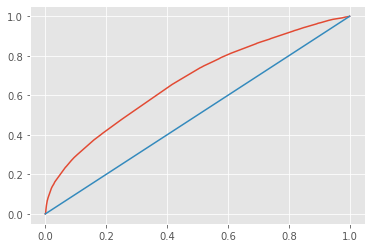

In [ ]:
plt.plot(frp, tpr)
plt.plot([0,1], [0,1])

**Comprovar si hay overtiffing**

In [ ]:
for i in range(1,15) :
 dt_overfit = DecisionTreeClassifier(max_depth = i, random_state = 42)
 dt_overfit.fit(X_train, y_train)
 acc_test = dt_overfit.score(X_test, y_test)
 acc_train = dt_overfit.score(X_train, y_train)

 print(f'El modelo se entrena con una profundidad de {i} preguntas')
 print(f' La accuracy del modelo en train es {np.round(acc_train,4)}, en test es {np.round(acc_test,4)}')
 print(f' La diferencia es de {np.round(acc_train-acc_test, 4)}')
 print('_________________________________________________________________')

El modelo se entrena con una profundidad de 1 preguntas
 La accuracy del modelo en train es 0.5859, en test es 0.5816
 La diferencia es de 0.0043
_________________________________________________________________
El modelo se entrena con una profundidad de 2 preguntas
 La accuracy del modelo en train es 0.5859, en test es 0.5816
 La diferencia es de 0.0043
_________________________________________________________________
El modelo se entrena con una profundidad de 3 preguntas
 La accuracy del modelo en train es 0.602, en test es 0.6015
 La diferencia es de 0.0005
_________________________________________________________________
El modelo se entrena con una profundidad de 4 preguntas
 La accuracy del modelo en train es 0.6178, en test es 0.6147
 La diferencia es de 0.003
_________________________________________________________________
El modelo se entrena con una profundidad de 5 preguntas
 La accuracy del modelo en train es 0.6181, en test es 0.6151
 La diferencia es de 0.003
_________

Com més preguntes li fem al model el train augmenta, en canvi el test baixa, de manera que si afegissim més preguntes el train s'adaptaria molt més al model generant overfitting. 

En aquest cas, s'observa que tan el train com el test es mantenent més o menys amb el mateix percentatge, tot i que hi ha una diferencia significativa entre la 7 i 11 pregunta, ja que entre la diferència de train i test comença a augmentar, 
Aleshores, al model, com a màxim seria bo fer-li 11 preguntes per deixar la flexibilitat justa i que no generes l'overfitting. 

